<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/codigo/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive

In [2]:
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"
directory = ""

#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: important!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


#dates
import matplotlib.dates as mdates


# CASOS

Casos diarios y acumulados

In [59]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,1,6,0,0,0,0,0,7
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,139,294,337,40,99,22,121,19,15,1086
2021-06-21,113,213,188,34,47,24,115,17,13,764
2021-06-22,153,124,390,68,74,148,658,35,17,1667
2021-06-23,154,419,469,79,166,148,738,84,13,2270


In [5]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,1,0,0,1
2020-03-13,0,0,1,6,0,0,1,0,0,8
2020-03-14,0,0,1,6,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,25332,87977,61296,21640,19287,32597,148086,19325,6506,422046
2021-06-21,25445,88190,61484,21674,19334,32621,148201,19342,6519,422810
2021-06-22,25598,88314,61874,21742,19408,32769,148859,19377,6536,424477
2021-06-23,25752,88733,62343,21821,19574,32917,149597,19461,6549,426747


# Muertes

Muertes diarias y acumuladas

In [60]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,4,5,19,2,5,4,4,1,0,44
2021-06-21,8,8,11,0,2,2,7,1,3,42
2021-06-22,6,6,20,5,7,4,15,3,3,69
2021-06-23,6,4,24,8,3,5,35,1,0,86


In [7]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,1115,2255,2397,1083,664,826,5042,822,301,14505
2021-06-21,1123,2263,2408,1083,666,828,5049,823,304,14547
2021-06-22,1129,2269,2428,1088,673,832,5064,826,307,14616
2021-06-23,1135,2273,2452,1096,676,837,5099,827,307,14702


# Pruebas
Pruebas procesadas. Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [63]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

pruebas_edu



,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
Fecha,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,51.0,2294.0,25.0,1159.0,NaN,3444.0,2.0,465.0,20.0,156.0,15.0,50.0,22.0,175.0,123.0,230.0,15.0,76.0
2020-05-08,64.0,2399.0,29.0,1203.0,NaN,3532.0,1.0,472.0,20.0,170.0,10.0,60.0,44.0,176.0,NaN,230.0,13.0,79.0
2020-05-09,67.0,2515.0,29.0,1244.0,NaN,3638.0,15.0,475.0,33.0,186.0,10.0,61.0,NaN,NaN,NaN,239.0,NaN,NaN
2020-05-10,57.0,2578.0,29.0,1252.0,NaN,3889.0,0.0,492.0,4.0,215.0,25.0,61.0,29.0,228.0,182.0,244.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,552.0,258521.0,280.0,241870.0,NaN,532980.0,NaN,47749.0,39.0,46878.0,NaN,61129.0,NaN,63006.0,45.0,40778.0,117.0,16520.0
2021-06-22,2213.0,259497.0,340.0,244297.0,NaN,537241.0,NaN,47942.0,58.0,46953.0,NaN,61694.0,NaN,63424.0,30.0,40943.0,82.0,16600.0
2021-06-23,1869.0,262596.0,400.0,246671.0,NaN,541090.0,NaN,48346.0,57.0,47208.0,NaN,62321.0,NaN,63945.0,20.0,41120.0,81.0,16677.0


In [64]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [65]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [66]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2021-06-21,60120.0,1732241.0,88451.0,303354.0,346711.0,69423.0,23039.0,66212.0,681181.0,93750.0
2021-06-22,60320.0,1743068.0,89022.0,306171.0,347811.0,69684.0,23136.0,66361.0,686100.0,94463.0
2021-06-23,60581.0,1756721.0,89697.0,309014.0,351329.0,70167.0,23226.0,66782.0,690687.0,95238.0
2021-06-24,61077.0,1769996.0,90147.0,311761.0,354557.0,70606.0,23331.0,67060.0,695282.0,96175.0
2021-06-25,61077.0,1769996.0,90147.0,311761.0,354557.0,70606.0,23331.0,67060.0,695282.0,96175.0


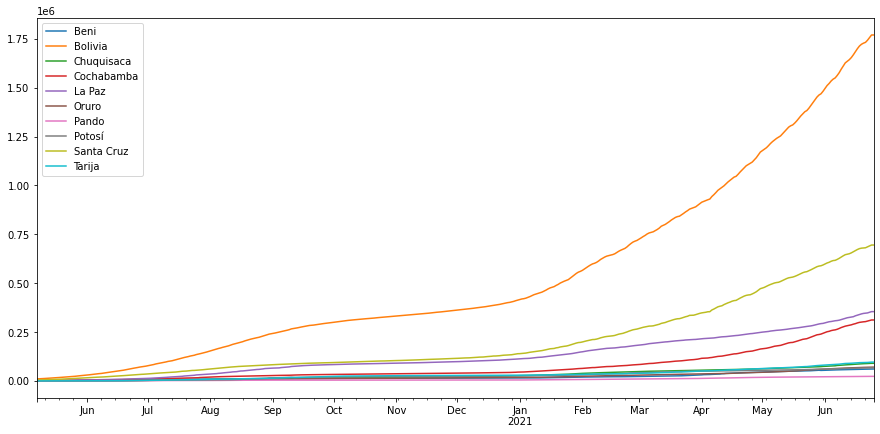

In [67]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum.plot(figsize = (15,7))
plt.legend()

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

In [68]:
pruebas_acum.to_csv("pruebas_acum.csv")

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,81.0,457.0,1.0,52.0,128.0,8.0,3.000000,14.0,157.0,13.0
2020-05-09,9.0,618.5,28.0,46.0,123.0,8.0,5.333333,16.0,256.0,2.0
2020-05-10,7.0,618.5,28.0,17.0,71.0,20.0,5.333333,29.0,347.0,NaN
2020-05-11,84.0,618.5,11.0,9.0,83.0,13.0,5.333333,7.0,647.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-21,110.0,4141.0,326.0,943.0,1367.0,146.0,37.000000,95.0,1003.0,114.0
2021-06-22,200.0,10827.0,571.0,2817.0,1100.0,261.0,97.000000,149.0,4919.0,713.0
2021-06-23,261.0,13653.0,675.0,2843.0,3518.0,483.0,90.000000,421.0,4587.0,775.0
2021-06-24,496.0,13275.0,450.0,2747.0,3228.0,439.0,105.000000,278.0,4595.0,937.0


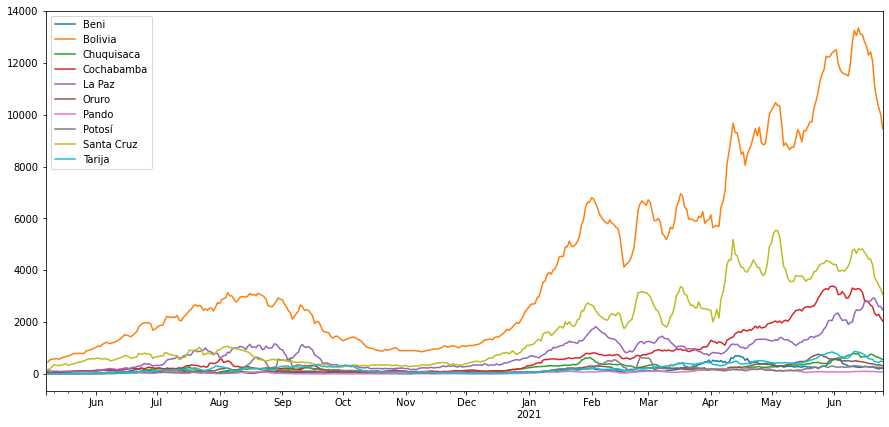

In [69]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.rolling(7,min_periods=1).mean().interpolate().plot(figsize = (15,7))
#ax.plot(pruebas_diarias.index, pruebas_diarias)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%M"))
# ax.grid()
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias

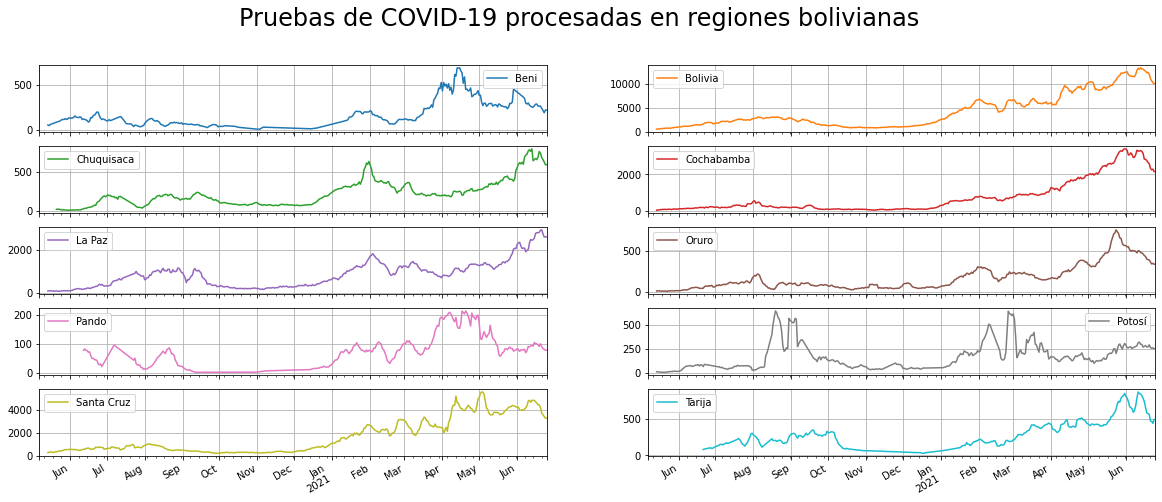

In [70]:
axs = pruebas_diarias.rolling(7).mean().interpolate().plot(
                                                           subplots=True,
                                                           layout=(5,2),
                                                           sharey=False,
                                                           figsize = (20,8),
                                                           legend=True,
                                                           grid=True)

plt.suptitle("Pruebas de COVID-19 procesadas en regiones bolivianas", fontsize="24")
plt.legend(loc="upper left")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-08,1.000000,0.404814,0.000000,0.153846,0.179688,0.125000,0.000000,0.000000,0.439490,0.230769
2020-05-09,0.000000,0.276475,0.107143,0.108696,0.056911,0.625000,0.000000,0.000000,0.585938,0.500000
2020-05-10,0.285714,0.192401,0.035714,0.529412,0.112676,0.150000,0.000000,0.000000,0.276657,NaN
2020-05-11,0.892857,0.444624,0.000000,0.555556,0.048193,0.000000,0.000000,0.142857,0.293663,0.000000
2020-05-12,0.000000,0.215036,NaN,0.179487,0.029126,0.222222,NaN,0.000000,0.392308,0.136364
...,...,...,...,...,...,...,...,...,...,...
2021-06-21,0.154545,0.184496,0.346626,0.199364,0.155816,0.232877,0.351351,0.494737,0.114656,0.210526
2021-06-22,0.175000,0.153967,0.267951,0.138445,0.112727,0.260536,0.175258,0.496644,0.133767,0.207574
2021-06-23,0.321839,0.166264,0.228148,0.164967,0.119102,0.163561,0.144444,0.394299,0.160889,0.190968
2021-06-24,0.120968,0.183051,0.326667,0.175100,0.141574,0.271071,0.257143,0.384892,0.195865,0.140875


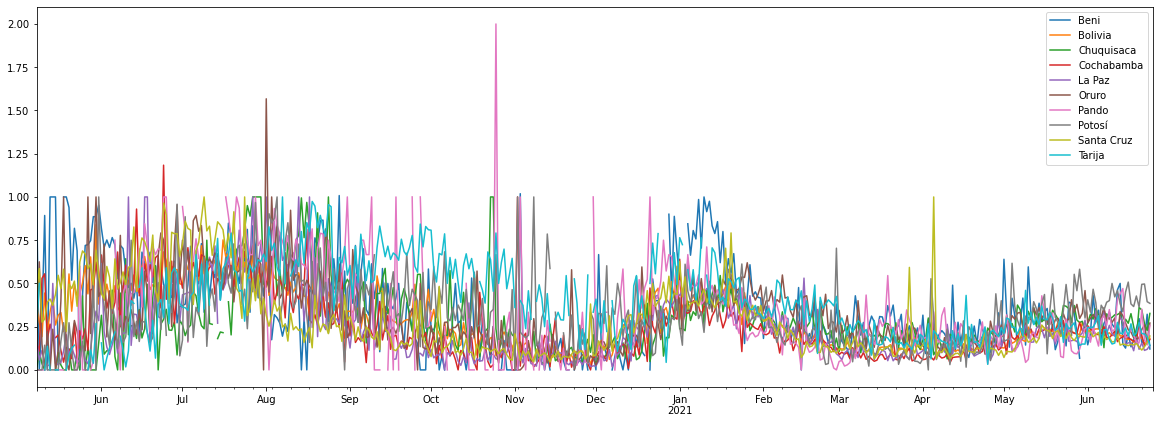

In [71]:
positividad_diaria = casos_diarios / pruebas_diarias
positividad_diaria = positividad_diaria.drop(positividad_diaria.index[0:59])
positividad_diaria.plot(figsize = (20,7))

positividad_diaria.to_csv(directory + "positividad_diaria.csv")

positividad_diaria

In [72]:
positividad_diaria_adj = positividad_diaria.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-08,1.000000,0.404814,0.000000,0.153846,0.179688,0.125000,0.000000,0.000000,0.439490,0.230769
2020-05-09,0.500000,0.340645,0.053571,0.131271,0.118299,0.375000,0.000000,0.000000,0.512714,0.365385
2020-05-10,0.428571,0.291230,0.047619,0.263985,0.116425,0.300000,0.000000,0.000000,0.434028,0.365385
2020-05-11,0.544643,0.329579,0.035714,0.336877,0.099367,0.225000,0.000000,0.035714,0.398937,0.243590
2020-05-12,0.435714,0.306670,0.035714,0.305399,0.085319,0.224444,0.000000,0.028571,0.397611,0.216783
...,...,...,...,...,...,...,...,...,...,...
2021-06-21,0.190464,0.178308,0.289315,0.195606,0.148017,0.214607,0.213293,0.427346,0.139651,0.228485
2021-06-22,0.197453,0.174365,0.285697,0.186107,0.143307,0.213108,0.211664,0.434044,0.137923,0.223563
2021-06-23,0.213241,0.173001,0.279746,0.183262,0.137980,0.203328,0.204559,0.417833,0.140900,0.222927
2021-06-24,0.211407,0.173740,0.279934,0.183175,0.135667,0.210768,0.206964,0.418317,0.147754,0.204973


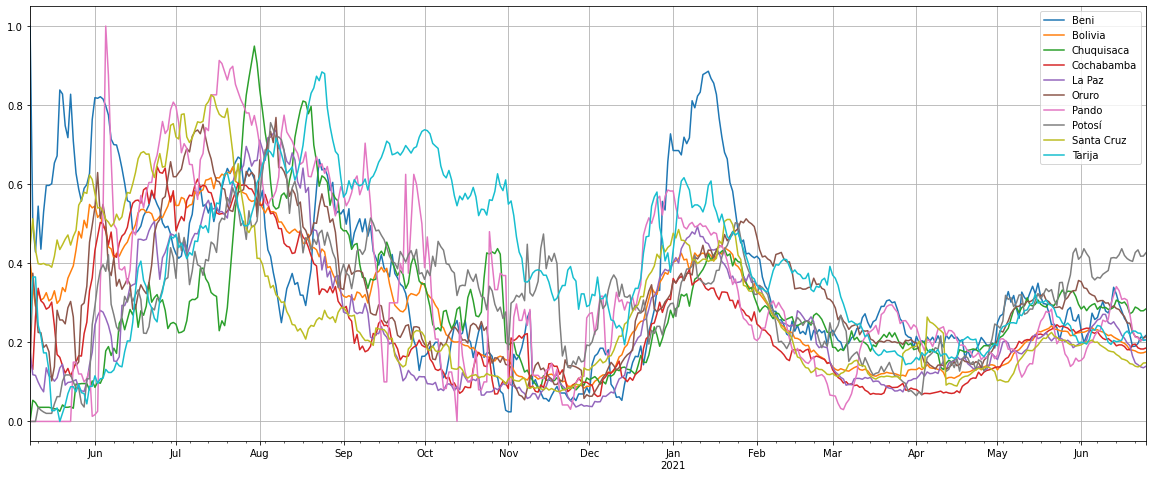

In [73]:
positividad_diaria_adj.plot(figsize = (20,8))
plt.grid()
plt.savefig(directory + "positividad_diaria_todos.jpg")

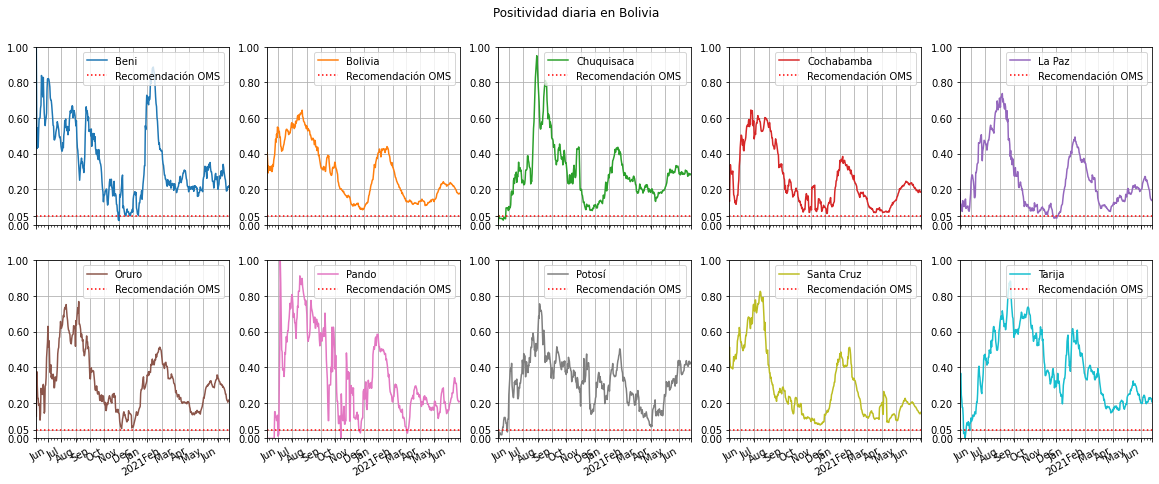

In [74]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia', y=.95)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()

plt.savefig(directory + "positividad.jpg")

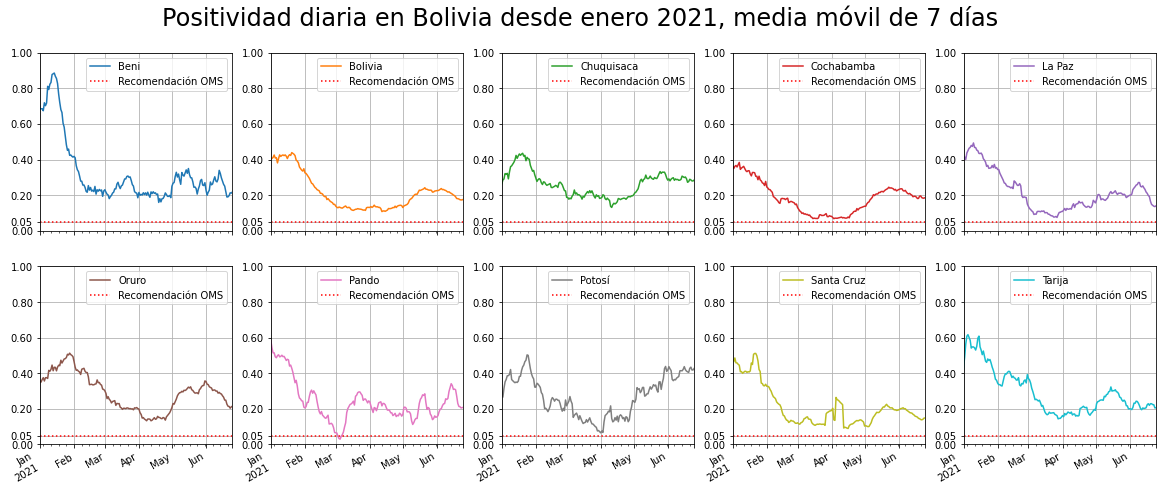

In [100]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()
  axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


plt.savefig(directory + "positividad_2021.jpg")